# Plots for differentiation <a class="anchor" id="top"></a>
Plots of:
+ [temperature](#temp)
+ [% iron melted](#iron)
+ [% silictae melted](#silicate)
+ [Rayleigh number](#rayleigh)
+ [Critical rayleigh number](#critical-rayleigh)
+ [Convecting cells](#convecting)
+ [specific heat capacity](#cp)

as a function of time for the differentiation stage of evolution.

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#scale time to Myr
from parameters import Myr, r, dr #need to change so import from save file instead

Choose run and whether you want to save figure

In [2]:
run=2
save = False # do you want to save your figures?

Load npz files

In [3]:
npzfile = np.load(f'Results_combined/run_{run}_diff.npz')
T = npzfile['Tdiff'] 
iron = npzfile['Xfe']
silicate = npzfile['Xsi']
cp = npzfile['cp']
t = npzfile['t_diff']
H = npzfile['H']
Ra = npzfile['Ra']
Ra_crit = npzfile['Ra_crit']
convect = npzfile['convect']
d0 = npzfile['d0']

Scale time, choose whether or not to plot logarithmically

In [4]:
t_plot = t/Myr
log_time = True # do you want to plot time logarithmically
dt = 1 #for now plot everything in units of timestep

## Temperature <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [5]:
import matplotlib.colors as mcolors

In [6]:
rplot = np.arange(0,r,dr)

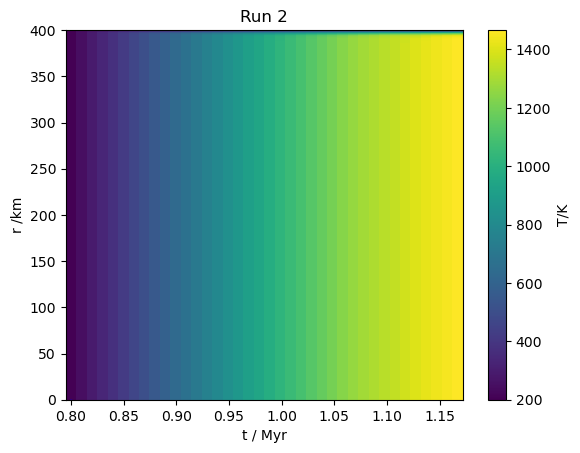

In [7]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,T,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
plt.plot(t/Myr,(r-d0)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
#plt.vlines(t[convect==True][0]/Myr,0,r)
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.ylim([0,r/1e3])
#plt.xlim([0.5,0.7])
plt.colorbar(label='T/K')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/Tdiff_run{run}.png')

## Melted silicate content <a class="anchor" id="silicate"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

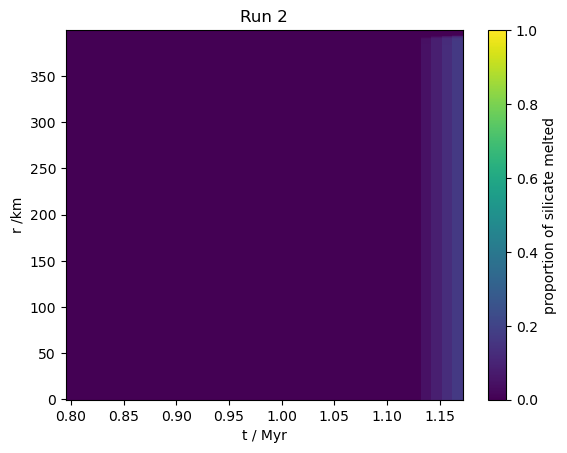

In [8]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,silicate,shading = 'nearest',vmin=0, vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_diff_run_{run}.png')

## Melted iron content <a class="anchor" id="iron"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

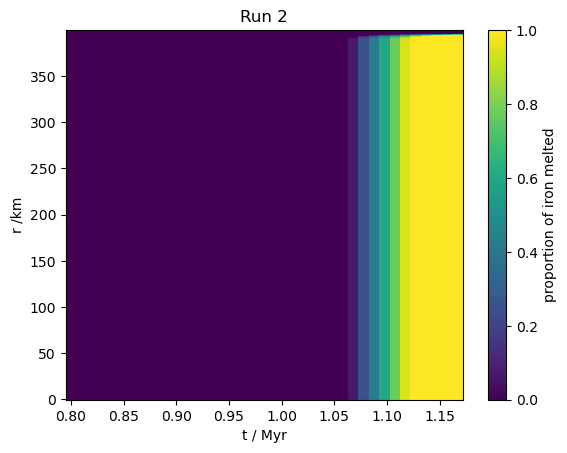

In [9]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,iron,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of iron melted')
if save ==True:
    plt.savefig(f'Plots/fe_diff_run_{run}.png')

## Specific heat capacity <a class="anchor" id="cp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

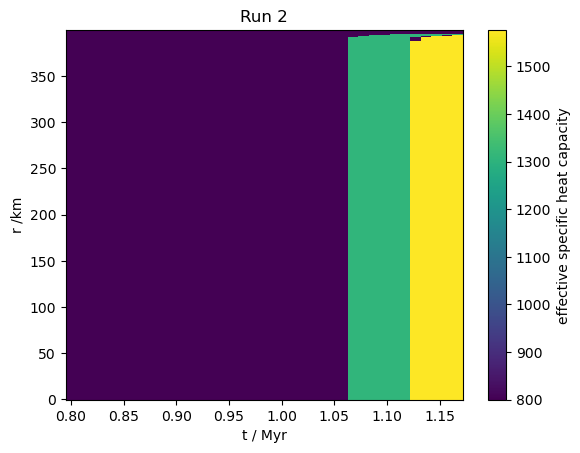

In [10]:
plt.figure()
plt.pcolormesh(t/Myr, rplot/1e3,cp,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='effective specific heat capacity')
if save ==True:
    plt.savefig(f'Plots/fe_diff_run_{run}.png')

## Radiogenic heating<a class="anchor" id="heat"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

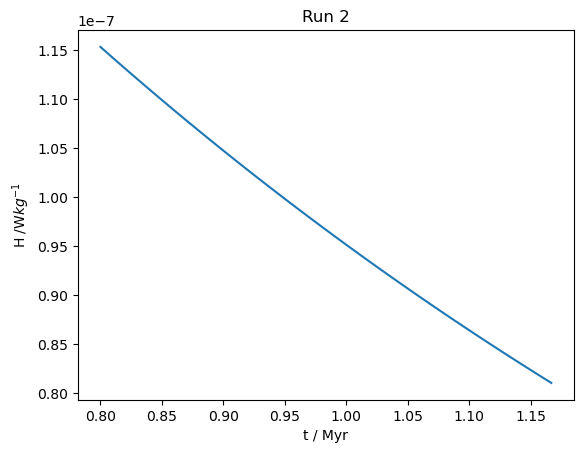

In [11]:
plt.figure()
plt.plot(t_plot,H) #
#plt.yscale('log')
plt.ylabel('H /W$kg^{-1}$')
plt.xlabel('t / Myr')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/H_diff_run{run}b.png')

## Rayleigh number<a class="anchor" id="rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

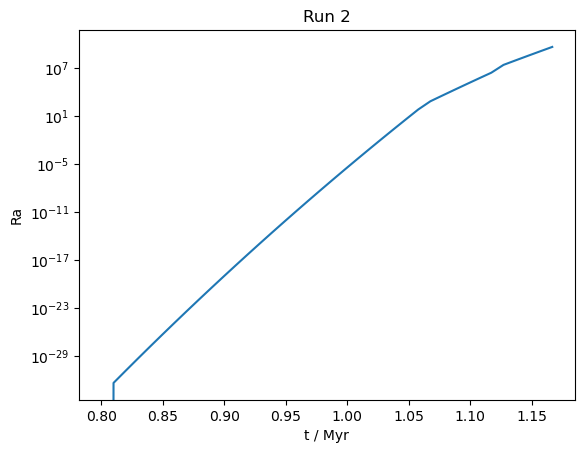

In [12]:
plt.figure()
plt.semilogy(t_plot,Ra) #
#plt.yscale('log')
plt.ylabel('Ra')
plt.xlabel('t / Myr')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/Ra_diff_run{run}b.png')

### Time difference between onset of convection and growth of convective instabilities being large enough.

In [13]:
tlag_Myr = (t[Ra>1e7][0]-t[convect==True][0])/Myr
tlag_step = (t[Ra>1e7][0]-t[convect==True][0])/dt
fstep = tlag_step*dt/t[-1]
print(f'Time lag is {tlag_Myr:.3f} Myr which is {tlag_step:.0f} timesteps which is {fstep:.2f} of total timesteps for a 2Myr run')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [14]:
t[convect==True]

array([], dtype=float64)

In [ ]:
t[Ra>1e7]

### Time difference between onset of convection and $\phi > 50\%$

In [ ]:
tlag_Myr = (t[silicate[0,:]>0.5][0]-t[convect==True][0])/Myr
tlag_step = tlag_Myr*Myr/dt
fstep = tlag_step*dt/t[-1]
Tlag = T[0,silicate[0,:]>0.5][0]-T[0,convect==True][0]
print(f'Time lag is {tlag_Myr:.3f} Myr which is {tlag_step:.0f} timesteps which is {fstep:.2f} of total timesteps for a 2Myr run')
print(f'This is a temperature difference of {Tlag:.1f}K')

### Melt fraction at onset of convection.

In [ ]:
frac_onset = melt_frac[0,convect==True][0]
print(T[0,convect==True][0])
print(f'The silicate melt fraction at the onset of convection is {frac_onset:.2f}')

### Time at onset of convection

In [ ]:
t[convect==True][0]/Myr

## Critical Rayleigh number<a class="anchor" id="critical-rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [ ]:
plt.figure()
plt.semilogy(t_plot,Ra,label='Ra')
plt.semilogy(t_plot,Ra_crit,label='Ra crit') #
#plt.yscale('log')
plt.ylabel('Ra')
plt.xlabel('t / Myr')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/Racrit_diff_run{run}b.png')

## Convecting cells<a class="anchor" id="convecting"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [ ]:
plt.figure()
plt.scatter(t_plot,convect) #
#plt.yscale('log')
plt.ylabel('Convect')
plt.xlabel('t / Myr')
plt.title(f'Run {run}')
if save == True:
    plt.savefig(f'Plots/convect_run{run}b.png')